# Credit EDA on Loan Application - 'Anjalika Roychowdhury'

### Problem Statement:
##### The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter.

#### Objective: 

###### This case study aims to identify the pattern indicating if consumers have difficulty in paying the installments which can be used for taking actions like reducing the loan amount, lending at higher rate of interest, rejecting the loan etc.This will ensure that consumers are capable of repaying the loan are not rejected.To find out how bank approves and refuses the loan. Find out different pattern and outcomes to help the bank reduce the credit risk and interest. The two input files are extracted, cleaned and few columns are analysed through different plots/charts generated using different python libraries and conculsions are drawn based on the outcomes.

#### Following are the steps:

## Filter warnings:

In [1]:
## Filtering out the warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

## 1. Data Sourcing - Data Understanding

In [3]:
## Reading the application_csv file
original_app_data = pd.read_csv("/Volumes/Transcend/DS-41 /Credit EDA Excel files/application_data.csv")


## Displaying the first five rows:
original_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
## Understanding the shape of data:
original_app_data.shape

(307511, 122)

In [5]:
## Describe the data categorically:
original_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
## Note: Since the columns are very large  all columns will not be displayed using info(), 
## So info(-1) will be used to display all the columns:
## For individual null count values (show_counts=True) will be used:

original_app_data.info(-1, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
## Using describe() to show the statistical value of numerical column

original_app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
## Applying the nunique() on New_app_data to check the unique values in each columns and sorting in ascending order:
original_app_data.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [9]:
## Checking the null values and sorting in descending order
original_app_data.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

## 2. Finding and Analysing the missing values:

In [10]:
## For calculating the missing value we need to find out the length of New_app_data
len(original_app_data)

307511

In [11]:
## Checking the  null counts percentage of the columns and rounding upto 2 decimal digit and finding the missing value percentage
missing_col_per= round((original_app_data.isnull().sum()/len(original_app_data)*100),2)
missing_col_per


SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [12]:
# Filtering the columns having more than or equal to 50% of the missing value
missing_column_data = missing_col_per[missing_col_per>=50]

# Sorting the missing_column in descending values:

missing_column_data.sort_values(ascending= False)

COMMONAREA_AVG              69.87
COMMONAREA_MEDI             69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MEDI    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MODE    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MEDI       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MODE       68.35
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
FLOORSMIN_AVG               67.85
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
YEARS_BUILD_MEDI            66.50
OWN_CAR_AGE                 65.99
LANDAREA_AVG                59.38
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_MEDI          55.18
NONLIVINGAREA_AVG           55.18
ELEVATORS_MODE              53.30
ELEVATORS_MEDI              53.30
ELEVATORS_AVG 

In [13]:
# Checking the number of rows in missing_column_data:
missing_column_data.shape

(41,)

In [14]:
## Handling missing values

In [15]:
## Dropping the columns having more than 45% of missing values
## Matching the original data frames of "original_app_data" with the updated missing values and assigning it into the 
## New variable "new_app_data"

new_app_data = original_app_data.drop(columns= missing_column_data.index)
new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [16]:
## Cross check the shape of the "new_app_data" by using shape func.
new_app_data.shape

(307511, 81)

In [17]:
## Note :- all the missing values has been removed from the data frame....
    # original_app_data.shape =(307511,122)
    # new_app_data.shape=(307511, 73)
    # Difference is the missing_column_data.shape= 122-73= 49

In [18]:
# Filetering the columns having less than or eqaul to 13% of the missing values and sorting them in descending order
tiny_missing_values = missing_col_per[missing_col_per<=13]
tiny_missing_values.sort_values(ascending= False).head()

NAME_TYPE_SUITE             0.42
OBS_60_CNT_SOCIAL_CIRCLE    0.33
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [19]:
## Inferences

# Since column "NAME_TYPE_SUITE" has object value so it can be replaced by Nan.

# and columns "OBS_60_CNT_SOCIAL_CIRCLE", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
# has float data type so missing value could be replaced by using Median value

# Reason:- Because the missing value is very low so to impute these missing values with median..


In [20]:
## Checking the null values of rows, so now axis in the sum() to be 1 in order to do that:
missing_rows_values_per =(new_app_data.isnull().sum(axis=1)*100)/len(new_app_data)
missing_rows =missing_rows_values_per[missing_rows_values_per>=50]
missing_rows.sort_values(ascending= False)

Series([], dtype: float64)

In [21]:
## Note :- Since no missing values in the rows of new_app_data so no need to handle the missing values of rows:


## 3. Data cleaning and Manipulation

In [22]:
## Checking all the columns name of the "new_app_data" and comparing the data frame with the "original_app_data" and 
## find if there are some columns which might not impact the client's change of defaulting on loan:


In [23]:
# Checking the names of all the columns in the data frame 'app_data' & comparing the same with data dictionary (manually) to
# find if there are some columns which might not impact the client's chances of defaulting on loan:

new_app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [24]:
# On comparing found the following columns might not impact the chanced of defaulting:
no_impact_default_cols=["NAME_TYPE_SUITE","REGION_POPULATION_RELATIVE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE",
                   "FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY",
                   "WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","LIVE_CITY_NOT_WORK_CITY","EXT_SOURCE_2",
                    "EXT_SOURCE_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
                    "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5",
                    "FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11",
                    "FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17",
                    "FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"]



## Dropping columns from the "new_app_data" and viewing top 5 rows of the dataframe of "new_app_data"

new_app_data.drop(columns=no_impact_default_cols, inplace= True)
new_app_data.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                       0  Business Entity Type 3   
1                       0                       0                  School   
2                       0                       0              Government   
3                       0                       0  Business Entity Type 3   
4                       0                       1                Religion   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722         0.0833                        0.9722   
1                       0.9851         0.2917                        0.9851   
2                          NaN            NaN                           NaN   
3                          NaN            NaN                           NaN   
4                          NaN            NaN                           NaN   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0          0.0833                        0.9722          0.0833   
1          0.2917                        0.9851          0.2917   
2             NaN                           NaN             NaN   
3             NaN                           NaN             NaN   
4             NaN                           NaN             NaN   

   TOTALAREA_MODE EMERGENCYSTATE_MODE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0          0.0149              

In [25]:
# Viewing the shape of the data frame 'new_app_data':

new_app_data.shape

(307511, 40)

In [26]:
## Displaying the full information of the data structure "new_app_data"

new_app_data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_INCOME_TYPE              307511 non-null  object 
 12  NAME_EDUCATION_TYPE           307511 non-nul

In [27]:
## Describing the data statistically by using describe()
new_app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307499.000000     3.072330e+05  307511.000000   
mean   5.990260e+05   27108.573909     5.383962e+05  -16036.995067   
std    4.024908e+05   14493.737315     3.694465e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  \
count  307511.000000      307511.000000    307511.000000    307509.000000   
mean    63815.045904       -4986.120328     -2994.202373         2.152665   
std    141275.766519        3522.886321      1509.450419         0.910682   
min    -17912.000000      -24672.000000     -7197.000000         1.000000   
25%     -2760.000000       -7479.500000     -4299.000000         2.000000   
50%     -1213.000000       -4504.000000     -3254.000000         2.000000   
75%      -289.000000       -2010.000000     -1720.000000         3.000000   
max    365243.000000           0.000000         0.000000        20.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               307511.000000                307511.000000   
mean                     0.050769                     0.040659   
std                      0.219526                     0.197499   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           307511.000000           307511.000000   
mean                 0.078173                0.230454   
std                  0.268444                0.421124   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max                  1.000000                1.000000   

       YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  \
count                157504.000000  154491.000000   
mean                      0.977735       0.226282   
std                       0.059223       0.144641   
min                       0.000000       0.000000   
25%                       0.976700       0.166700   
50%                       0.981600       0.166700   
75%                       0.986600       0.333300   
max                       1.000000       1.000000   

       YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  \
count                 157504.000000   154491.000000   
mean                       0.977065        0.222315   
std                        0.064575        0.143709   
min                        0.000000        0.000000   
25%                        0.976700        0.166700   
50%                        0.981600        0.166700   
75%                        0.986600        0.333300   
max      

In [28]:
## Applying value_counts() on object datatype to check anomaly:

In [29]:
new_app_data["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [30]:
new_app_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
new_app_data["FLAG_OWN_CAR"].value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [32]:
new_app_data["FLAG_OWN_REALTY"].value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [33]:
new_app_data["NAME_INCOME_TYPE"].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [34]:
new_app_data["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [35]:
new_app_data["NAME_FAMILY_STATUS"].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [36]:
new_app_data["NAME_HOUSING_TYPE"].value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [37]:
new_app_data["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [38]:
new_app_data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [39]:
new_app_data["EMERGENCYSTATE_MODE"].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [40]:
## Checking the percentage values of "OCCUPATION_TYPE" and "ORGANIZATION_TYPE"
new_app_data["OCCUPATION_TYPE"].value_counts(normalize= True) 

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [41]:
new_app_data["ORGANIZATION_TYPE"].value_counts(normalize= True) 

Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [42]:
## 18% of "ORGANIZATION_TYPE" column has "XNA" value which needs to be dropped as there is no impact of these on 
#data frames

new_app_data= new_app_data[~(new_app_data.ORGANIZATION_TYPE=="XNA")]


In [43]:
new_app_data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [44]:
## For the above analysis it was found that in "CODE_GENDER" column 'XNA' term is mentioned.
## we need to impute the value of 'XNA' with 'F' which stands for female

new_app_data.loc[new_app_data["CODE_GENDER"]=="XNA", "CODE_GENDER"]="F"
new_app_data["CODE_GENDER"].value_counts()

F    157181
M     94956
Name: CODE_GENDER, dtype: int64

In [45]:
new_app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            -3648.0            -2120        Laborers              1.0   
1            -1186.0             -291      Core staff              2.0   
2            -4260.0            -2531        Laborers              1.0   
3            -9833.0            -2437        Laborers              2.0   
4            -4311.0            -3458      Core staff              1.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                       0  Business Entity Type 3   
1                       0                       0                  School   
2                       0                       0              Government   
3                       0                       0  Business Entity Type 3   
4                       0                       1                Religion   

   YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  \
0                       0.9722         0.0833                        0.9722   
1                       0.9851         0.2917                        0.9851   
2                          NaN            NaN                           NaN   
3                          NaN            NaN                           NaN   
4                          NaN            NaN                           NaN   

   FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  \
0          0.0833                        0.9722          0.0833   
1          0.2917                        0.9851          0.2917   
2             NaN                           NaN             NaN   
3             NaN                           NaN             NaN   
4             NaN                           NaN             NaN   

   TOTALAREA_MODE EMERGENCYSTATE_MODE  AMT_REQ_CREDIT_BUREAU_HOUR  \
0          0.0149              

In [46]:
## From the above table we see that "DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION" and "DAYS_ID_PUBLISH" columns
#has negative values..
days_columns_table = ["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]
new_app_data[days_columns_table].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0       -9461           -637            -3648.0            -2120
1      -16765          -1188            -1186.0             -291
2      -19046           -225            -4260.0            -2531
3      -19005          -3039            -9833.0            -2437
4      -19932          -3038            -4311.0            -3458

In [47]:
## we need to convert these negative values to positive values:

new_app_data[days_columns_table] =new_app_data[days_columns_table].abs()
new_app_data[days_columns_table].head()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
0        9461            637             3648.0             2120
1       16765           1188             1186.0              291
2       19046            225             4260.0             2531
3       19005           3039             9833.0             2437
4       19932           3038             4311.0             3458

## 4. Outlier Analysis

In [48]:
## Finding outliers

In [49]:
new_app_data.describe().T

count           mean            std  \
SK_ID_CURR                    252137.0  278114.643103  102815.635309   
TARGET                        252137.0       0.086600       0.281248   
CNT_CHILDREN                  252137.0       0.498515       0.763161   
AMT_INCOME_TOTAL              252137.0  175914.070795  258851.587748   
AMT_CREDIT                    252137.0  611398.457583  406527.199875   
AMT_ANNUITY                   252125.0   27812.325168   14647.759104   
AMT_GOODS_PRICE               251881.0  549405.668191  373268.534580   
DAYS_BIRTH                    252137.0   14769.133174    3662.573769   
DAYS_EMPLOYED                 252137.0    2384.169325    2338.360162   
DAYS_REGISTRATION             252137.0    4635.430849    3252.169156   
DAYS_ID_PUBLISH               252137.0    2800.639724    1515.360629   
CNT_FAM_MEMBERS               252135.0       2.252523       0.942116   
REG_REGION_NOT_WORK_REGION    252137.0       0.061919       0.241008   
LIVE_REGION_NOT_WORK_REGION   252137.0       0.049588       0.217093   
REG_CITY_NOT_LIVE_CITY        252137.0       0.089769       0.285851   
REG_CITY_NOT_WORK_CITY        252137.0       0.281065       0.449520   
YEARS_BEGINEXPLUATATION_AVG   129796.0       0.977498       0.061101   
FLOORSMAX_AVG                 127280.0       0.227354       0.145498   
YEARS_BEGINEXPLUATATION_MODE  129796.0       0.976807       0.066543   
FLOORSMAX_MODE                127280.0       0.223320       0.144556   
YEARS_BEGINEXPLUATATION_MEDI  129796.0       0.977518       0.061847   
FLOORSMAX_MEDI                127280.0       0.226978       0.145941   
TOTALAREA_MODE                131084.0       0.103299       0.108667   
AMT_REQ_CREDIT_BUREAU_HOUR    218281.0       0.006588       0.085093   
AMT_REQ_CREDIT_BUREAU_DAY     218281.0       0.006977       0.111020   
AMT_REQ_CREDIT_BUREAU_WEEK    218281.0       0.034071       0.202825   
AMT_REQ_CREDIT_BUREAU_MON     218281.0       0.282003       0.948367   
AMT_REQ_CREDIT_BUREAU_QRT     218281.0       0.259812       0.823679   
AMT_REQ_CREDIT_BUREAU_YEAR    218281.0       1.856277       1.826298   

                                   min          25%          50%          75%  \
SK_ID_CURR                    100002.0  189035.0000  278064.0000  367165.0000   
TARGET                             0.0       0.0000       0.0000       0.0000   
CNT_CHILDREN                       0.0       0.0000       0.0000       1.0000   
AMT_INCOME_TOTAL               25650.0  112500.0000  157500.0000  211500.0000   
AMT_CREDIT                     45000.0  277969.5000  521280.0000  829224.0000   
AMT_ANNUITY                     1980.0   17073.0000   25834.5000   35617.5000   
AMT_GOODS_PRICE                40500.0  247500.0000  450000.0000  693000.0000   
DAYS_BIRTH                      7489.0   11775.0000   14573.0000   17563.0000   
DAYS_EMPLOYED                      0.0     767.0000    1648.0000    3175.0000   
DAYS_REGISTRATION                  0.0    1845.0000    4265.0000    6952.0000   
DAYS_ID_PUBLISH                    0.0    1487.0000    2886.0000    4177.0000   
CNT_FAM_MEMBERS                    1.0       2.0000       2.0000       3.0000   
REG_REGION_NOT_WORK_REGION         0.0       0.0000       0.0000       0.0000   
LIVE_REGION_NOT_WORK_REGION        0.0       0.0000       0.0000       0.0000   
REG_CITY_NOT_LIVE_CITY             0.0       0.0000       0.0000       0.0000   
REG_CITY_NOT_WORK_CITY             0.0       0.0000       0.0000       1.0000   
YEARS_BEGINEXPLUATATION_AVG        0.0       0.9767       0.9816       0.9866   
FLOORSMAX_AVG                      0.0       0.1667       0.1667       0.3333   
YEARS_BEGINEXPLUATATION_MODE       0.0       0.9767       0.9816       0.9866   
FLOORSMAX_MODE                     0.0       0.1667       0.1667       0.3333   
YEARS_BEGINEXPLUATATION_MEDI       0.0       0.9767       0.9816       0.9866   
FLOORSMAX_MEDI                     0.0       0.1667       0.1667       0.3333   
TOTALAREA

In [50]:
# Checking the column "CNT_FAM_MEMBERS" in the data frame:

new_app_data["CNT_FAM_MEMBERS"].describe()

count    252135.000000
mean          2.252523
std           0.942116
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

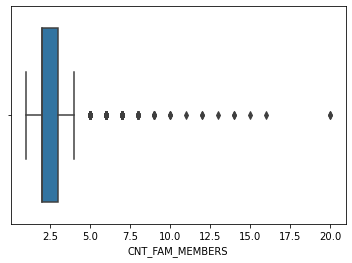

In [51]:
# Plotting  "CNT_FAM_MEMBERS":

sns.boxplot(new_app_data["CNT_FAM_MEMBERS"])
plt.show()

In [52]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["CNT_FAM_MEMBERS"].quantile(0.25)
Q3= new_app_data["CNT_FAM_MEMBERS"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

6.0

In [53]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 6:
outlier_1 = (new_app_data["CNT_FAM_MEMBERS"]<=6)
#final value of outlier after applying the outlier_1 to "CNT_FAM_MEMBERS"
final_outlier =new_app_data["CNT_FAM_MEMBERS"][outlier_1]
final_outlier.value_counts()

2.0    123330
3.0     51467
1.0     49049
4.0     24360
5.0      3417
6.0       396
Name: CNT_FAM_MEMBERS, dtype: int64

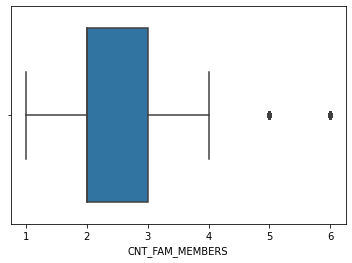

In [54]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [55]:
final_outlier.describe()

count    252019.000000
mean          2.249874
std           0.932853
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [56]:
# Inference:

## on "CNT_FAM_MEMBERS" column it is extremely rare to have more than 6 members.

In [57]:
# Checking the column "AMT_INCOME_TOTAL" in the data frame:

new_app_data["AMT_INCOME_TOTAL"].describe()

count    2.521370e+05
mean     1.759141e+05
std      2.588516e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.115000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

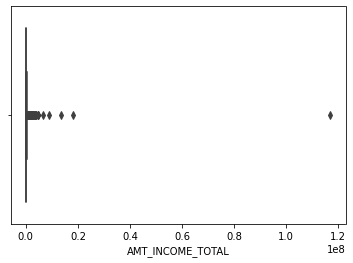

In [58]:
# Plotting  "AMT_INCOME_TOTAL":

sns.boxplot(new_app_data["AMT_INCOME_TOTAL"])
plt.show()

In [59]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["AMT_INCOME_TOTAL"].quantile(0.25)
Q3= new_app_data["AMT_INCOME_TOTAL"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

508500.0

In [60]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 508500:
outlier_1 = (new_app_data["AMT_INCOME_TOTAL"]<=508500)
#final value of outlier after applying the outlier_1 to "AMT_INCOME_TOTAL"
final_outlier =new_app_data["AMT_INCOME_TOTAL"][outlier_1]
final_outlier.value_counts()

135000.000    30206
112500.000    25161
157500.000    22734
180000.000    21805
225000.000    18460
90000.000     17306
202500.000    14387
270000.000     9856
67500.000      7608
315000.000     5411
247500.000     4744
81000.000      4423
360000.000     3813
126000.000     3729
121500.000     3076
292500.000     2976
99000.000      2728
103500.000     2535
144000.000     2516
450000.000     2262
76500.000      2216
171000.000     2202
117000.000     1803
166500.000     1688
337500.000     1649
405000.000     1524
108000.000     1445
189000.000     1421
72000.000      1400
162000.000     1332
54000.000      1270
148500.000     1206
94500.000      1187
216000.000     1170
45000.000      1130
85500.000       998
130500.000      946
193500.000      899
382500.000      864
211500.000      837
153000.000      782
175500.000      639
63000.000       633
58500.000       627
139500.000      618
234000.000      567
207000.000      531
252000.000      497
261000.000      449
184500.000      432


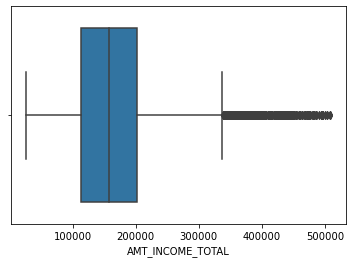

In [61]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [62]:
final_outlier.describe()

count    249601.000000
mean     169651.558167
std       78798.611606
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      508500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
# Inference

#  mean salary is approx. 169000, range from (Q3+(1.5*IQR)), till (Q3+(3*IQR)) has continous value and 
# outlier values of salaries till 508500 

In [64]:
# Checking the column "AMT_ANNUITY" in the data frame:

new_app_data["AMT_ANNUITY"].describe()

count    252125.000000
mean      27812.325168
std       14647.759104
min        1980.000000
25%       17073.000000
50%       25834.500000
75%       35617.500000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

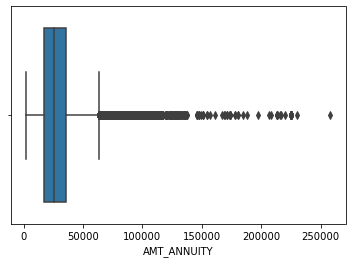

In [65]:
# Plotting  "AMT_ANNUITY":

sns.boxplot(new_app_data["AMT_ANNUITY"])
plt.show()

In [66]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["AMT_ANNUITY"].quantile(0.25)
Q3= new_app_data["AMT_ANNUITY"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

91251.0

In [67]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 91251:
outlier_1 = (new_app_data["AMT_ANNUITY"]<=91251)
#final value of outlier after applying the outlier_1 to "AMT_ANNUITY"
final_outlier =new_app_data["AMT_ANNUITY"][outlier_1]
final_outlier.value_counts()

9000.0     6047
13500.0    5131
6750.0     1962
10125.0    1675
37800.0    1383
11250.0    1221
20250.0    1168
26217.0    1166
26640.0    1151
12375.0    1136
31653.0    1102
22500.0    1053
36459.0    1036
16875.0    1013
22018.5     854
26446.5     815
33025.5     803
31261.5     799
25537.5     797
26316.0     751
40320.0     666
21906.0     657
21888.0     642
29970.0     629
32602.5     615
7875.0      600
27000.0     596
33750.0     589
30528.0     561
15750.0     543
21775.5     524
45000.0     520
23773.5     512
32895.0     498
29250.0     461
31630.5     453
21109.5     453
31522.5     453
19867.5     451
28408.5     434
26086.5     427
23931.0     423
35937.0     399
19125.0     396
46084.5     395
24543.0     388
22599.0     386
13963.5     385
26509.5     381
45333.0     378
20979.0     371
42790.5     360
67500.0     354
37669.5     342
38331.0     339
24246.0     332
32274.0     330
36864.0     329
32472.0     327
24592.5     326
27324.0     324
40063.5     323
24750.0 

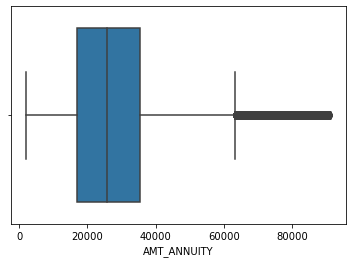

In [68]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [69]:
final_outlier.describe()

count    251370.000000
mean      27556.534461
std       13812.169311
min        1980.000000
25%       17037.000000
50%       25785.000000
75%       35523.000000
max       91219.500000
Name: AMT_ANNUITY, dtype: float64

In [70]:
# Inference:
 # average amt of annuity is approx. 27500,range from (Q3+(1.5*IQR)), till (Q3+(3*IQR)) has continous value and 
# outlier values of loan annuity.

In [71]:
# Checking the column "AMT_GOODS_PRICE" in the data frame:

new_app_data["AMT_GOODS_PRICE"].describe()

count    2.518810e+05
mean     5.494057e+05
std      3.732685e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.930000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

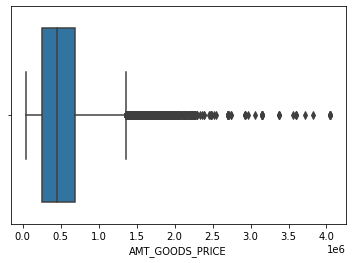

In [72]:
# Plotting  "AMT_GOODS_PRICE":

sns.boxplot(new_app_data["AMT_GOODS_PRICE"])
plt.show()

In [73]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["AMT_GOODS_PRICE"].quantile(0.25)
Q3= new_app_data["AMT_GOODS_PRICE"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

2029500.0

In [74]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 2029500:
outlier_1 = (new_app_data["AMT_GOODS_PRICE"]<=2029500)
#final value of outlier after applying the outlier_1 to "AMT_ANNUITY"
final_outlier =new_app_data["AMT_GOODS_PRICE"][outlier_1]
final_outlier.value_counts()

450000.0     23513
675000.0     19830
225000.0     18630
900000.0     13935
270000.0     10019
180000.0      8981
1125000.0     7771
454500.0      6912
135000.0      6534
315000.0      4401
679500.0      4130
1350000.0     4101
360000.0      3758
238500.0      3750
247500.0      3473
540000.0      3102
463500.0      3002
495000.0      2795
202500.0      2564
405000.0      2520
90000.0       2389
472500.0      2197
585000.0      2192
337500.0      2085
157500.0      2018
229500.0      1963
1800000.0     1876
630000.0      1810
1575000.0     1679
720000.0      1668
688500.0      1537
112500.0      1493
292500.0      1401
810000.0      1381
477000.0      1223
765000.0      1219
148500.0      1199
697500.0      1183
382500.0      1152
904500.0      1126
252000.0      1109
283500.0      1089
67500.0       1072
855000.0      1009
234000.0       975
945000.0       935
1129500.0      925
913500.0       898
328500.0       865
45000.0        825
193500.0       760
922500.0       754
459000.0    

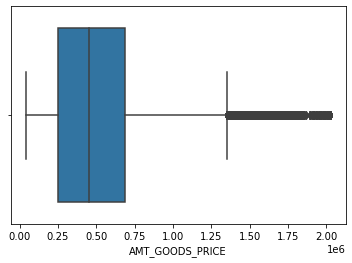

In [75]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [76]:
final_outlier.describe()

count    2.509880e+05
mean     5.432032e+05
std      3.588032e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.885000e+05
max      2.025000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [77]:
# Inference

# The average price of good is approx. 540000,range from (Q3+(1.5*IQR)), till (Q3+(3*IQR)) has continous value and 
# outlier values of amt of good.

In [78]:
# Checking the column "CNT_CHILDREN" in the data frame:

new_app_data["CNT_CHILDREN"].describe()

count    252137.000000
mean          0.498515
std           0.763161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

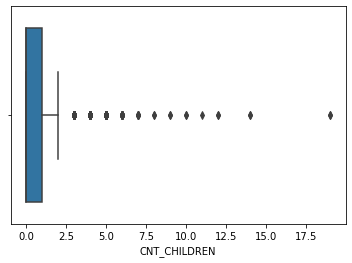

In [79]:
# Plotting  "CNT_CHILDREN":

sns.boxplot(new_app_data["CNT_CHILDREN"])
plt.show()

In [80]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["CNT_CHILDREN"].quantile(0.25)
Q3= new_app_data["CNT_CHILDREN"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

4.0

In [81]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 4:
outlier_1 = (new_app_data["CNT_CHILDREN"]<=4)
#final value of outlier after applying the outlier_1 to "CNT_CHILDREN"
final_outlier =new_app_data["CNT_CHILDREN"][outlier_1]
final_outlier.value_counts()

0    161911
1     59698
2     26365
3      3629
4       414
Name: CNT_CHILDREN, dtype: int64

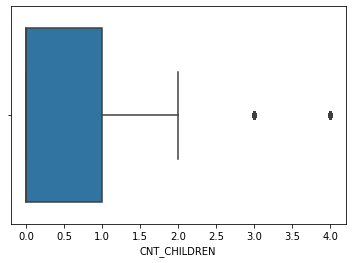

In [82]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [83]:
final_outlier.describe()

count    252017.000000
mean          0.495883
std           0.751884
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: CNT_CHILDREN, dtype: float64

In [84]:
# Checking the column "AMT_CREDIT" in the data frame:

new_app_data["AMT_CREDIT"].describe()

count    2.521370e+05
mean     6.113985e+05
std      4.065272e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.292240e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

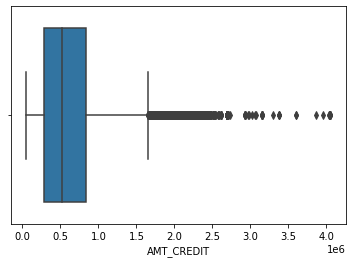

In [85]:
# Plotting  "AMT_CREDIT":

sns.boxplot(new_app_data["AMT_CREDIT"])
plt.show()

In [86]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_app_data["AMT_CREDIT"].quantile(0.25)
Q3= new_app_data["AMT_CREDIT"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

2482987.5

In [87]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 2482987.5 :
outlier_1 = (new_app_data["AMT_CREDIT"]<= 2482987.5)
#final value of outlier after applying the outlier_1 to "AMT_CREDIT"
final_outlier =new_app_data["AMT_CREDIT"][outlier_1]
final_outlier.value_counts()

450000.0     8764
675000.0     7109
180000.0     6850
270000.0     6600
225000.0     6394
900000.0     5665
545040.0     3970
135000.0     3093
808650.0     3069
1125000.0    3003
254700.0     2878
521280.0     2798
755190.0     2730
1078200.0    2608
1288350.0    2309
284400.0     2186
454500.0     2007
640080.0     1950
202500.0     1920
1350000.0    1909
269550.0     1889
315000.0     1737
247500.0     1703
781920.0     1619
592560.0     1605
1006920.0    1601
540000.0     1528
497520.0     1477
360000.0     1457
835380.0     1433
405000.0     1409
679500.0     1346
337500.0     1327
508495.5     1265
314100.0     1227
942300.0     1222
239850.0     1182
152820.0     1046
495000.0     1036
1546020.0    1023
585000.0     1020
157500.0      940
728460.0      886
343800.0      810
1800000.0     800
1223010.0     788
814041.0      778
630000.0      752
526491.0      747
1575000.0     741
312768.0      740
544491.0      682
1256400.0     670
760225.5      668
1024740.0     665
263686.5  

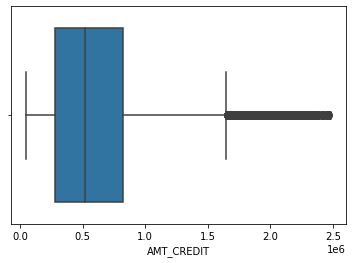

In [88]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [89]:
final_outlier.describe()

count    2.517990e+05
mean     6.086406e+05
std      3.995945e+05
min      4.500000e+04
25%      2.779695e+05
50%      5.212800e+05
75%      8.248230e+05
max      2.479860e+06
Name: AMT_CREDIT, dtype: float64

In [90]:
## From above analysis we can see that depending upon the income of person they spend money on good , so lets
# analyse "AMT_INCOME_TOTAL" and "AMT_GOODS_PRICE" together
new_app_data[["AMT_GOODS_PRICE","AMT_INCOME_TOTAL"]].describe()

AMT_GOODS_PRICE  AMT_INCOME_TOTAL
count     2.518810e+05      2.521370e+05
mean      5.494057e+05      1.759141e+05
std       3.732685e+05      2.588516e+05
min       4.050000e+04      2.565000e+04
25%       2.475000e+05      1.125000e+05
50%       4.500000e+05      1.575000e+05
75%       6.930000e+05      2.115000e+05
max       4.050000e+06      1.170000e+08

In [91]:
# since these values are of continuous value. Lets create bin for each of these columns and divide the values for 
# easy analysis:

In [92]:
new_app_data["AMT_INCOME_TOTAL"]=pd.cut(new_app_data.AMT_INCOME_TOTAL, 
                                                bins= [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000,
        400000, 425000, 450000, 475000, 500000, 10000000000], 
                                                labels=['0-25000', '25000-50000','50000-75000','75000,100000',
                                                        '100000-125000', '125000-150000', '150000-175000',
                                                        '175000-200000', '200000-225000','225000-250000',
                                                        '250000-275000','275000-300000','300000-325000',
                                                        '325000-350000','350000-375000', '375000-400000',
                                                        '400000-425000','425000-450000','450000-475000',
                                                        '475000-500000','500000 and above'])

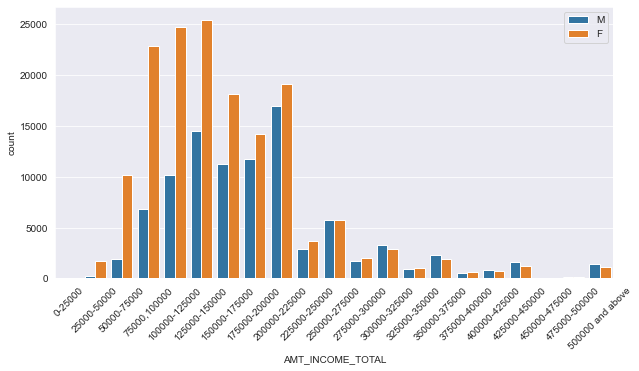

In [93]:
# Analysis:plotting amt income range
plt.figure(figsize=[10,5])
sns.set_style('darkgrid')
sns.countplot(data=new_app_data,x="AMT_INCOME_TOTAL", hue= "CODE_GENDER")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [94]:
## Inference:

#For the above we can see that Females are having higher income range

In [95]:
new_app_data["AMT_GOODS_PRICE"]=pd.cut(new_app_data.AMT_GOODS_PRICE, 
                                                bins= [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 
                                                       500000, 550000, 600000, 650000, 700000, 750000, 800000,
                                                        850000, 900000, 1000000000], 
                                                labels=['0-150000', '150000-200000','200000-250000', 
                                                        '250000-300000', '300000-350000', '350000-400000',
                                                        '400000-450000','450000-500000','500000-550000',
                                                        '550000-600000','600000-650000','650000-700000',
                                                        '700000-750000','750000-800000','800000-850000',
                                                        '850000-900000','900000 and above'])

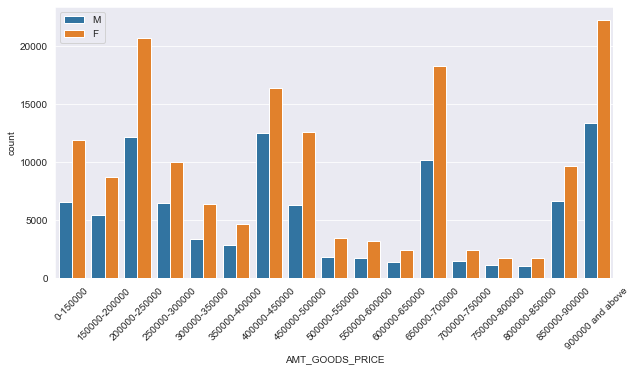

In [96]:
# Analysing: plotting AMT_GOODS_PRICE
plt.figure(figsize=[10,5])
sns.set_style('darkgrid')
sns.countplot(data=new_app_data,x="AMT_GOODS_PRICE", hue= "CODE_GENDER")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [97]:
## Inference:

#For the above we can see that Females having higher income range spend more on amt on goods.

## 5. Data Analysis

### Checking the imbalance percentage

#### Lets consider the column- TARGET
#### defaulter 1- client with payment difficulties: he/she had late payment.
#### non_defaulter 0- made the payment on time


In [98]:
round(new_app_data.TARGET.value_counts(normalize=True)*100,2)

0    91.34
1     8.66
Name: TARGET, dtype: float64

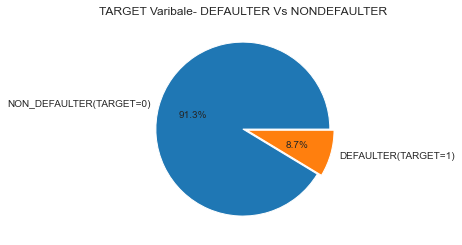

In [99]:
plt.pie(new_app_data["TARGET"].value_counts(normalize=True)*100,
        labels=["NON_DEFAULTER(TARGET=0)","DEFAULTER(TARGET=1)"],explode=(0,0.05),autopct="%.1f%%")
plt.title("TARGET Varibale- DEFAULTER Vs NONDEFAULTER")
plt.show()

In [100]:
# As we can observe the number of Non- defaulter clients (Tagert= 0) is more than defaulter clients (Target=1). 
# It is almost 8.65 % of NON-defaulter clients.
# To see correlation between Tareget=1 (i.e. Defaulter ) and Target=0 (i.e. Non defaulter).

In [101]:
defaulter=new_app_data.loc[new_app_data["TARGET"]==1]

In [102]:
defaulter.shape

(21835, 40)

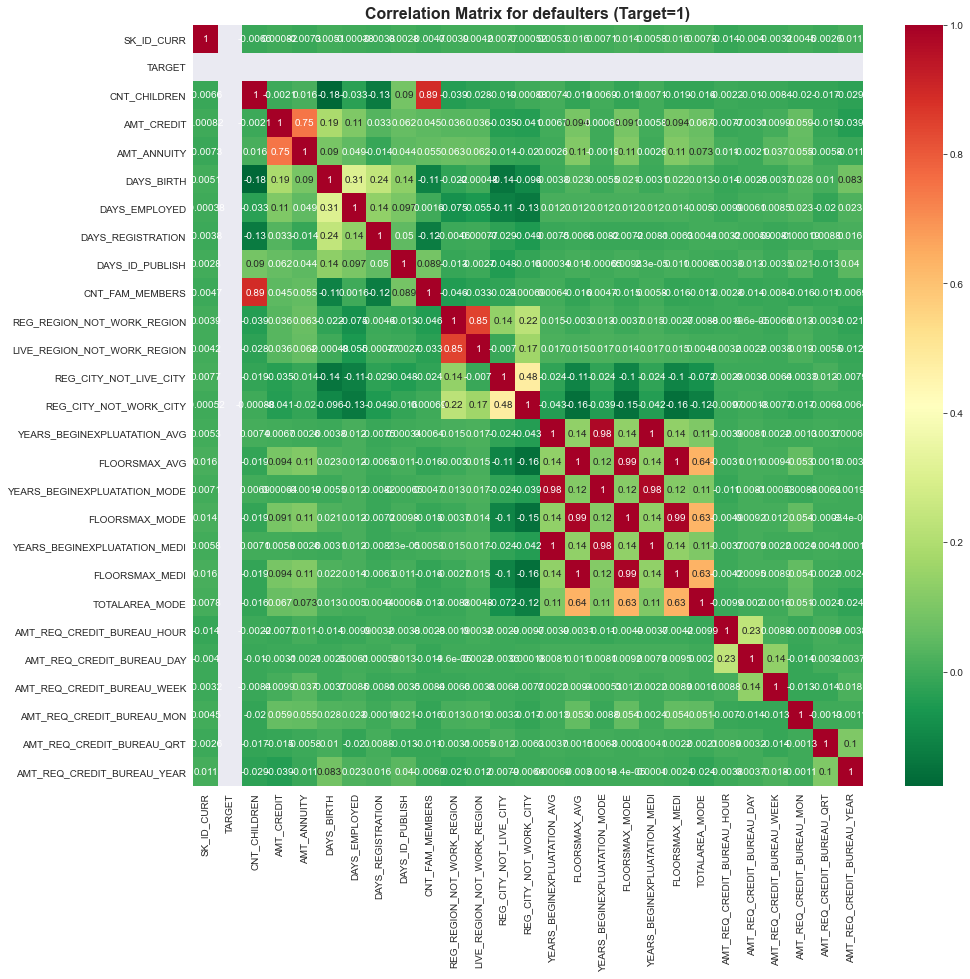

In [103]:
# # Plotting the correlation for defaulter clients with the help of heat map:

plt.figure(figsize=[15,14])
sns.heatmap(defaulter.corr(), annot= True, cmap="RdYlGn_r")
plt.title("Correlation Matrix for defaulters (Target=1)", fontsize=16, fontweight="bold" )
plt.show()

In [104]:
# Correlation Matrix for non-defaulter clients
non_defaulter=new_app_data.loc[new_app_data["TARGET"]==0]

In [105]:
non_defaulter.shape

(230302, 40)

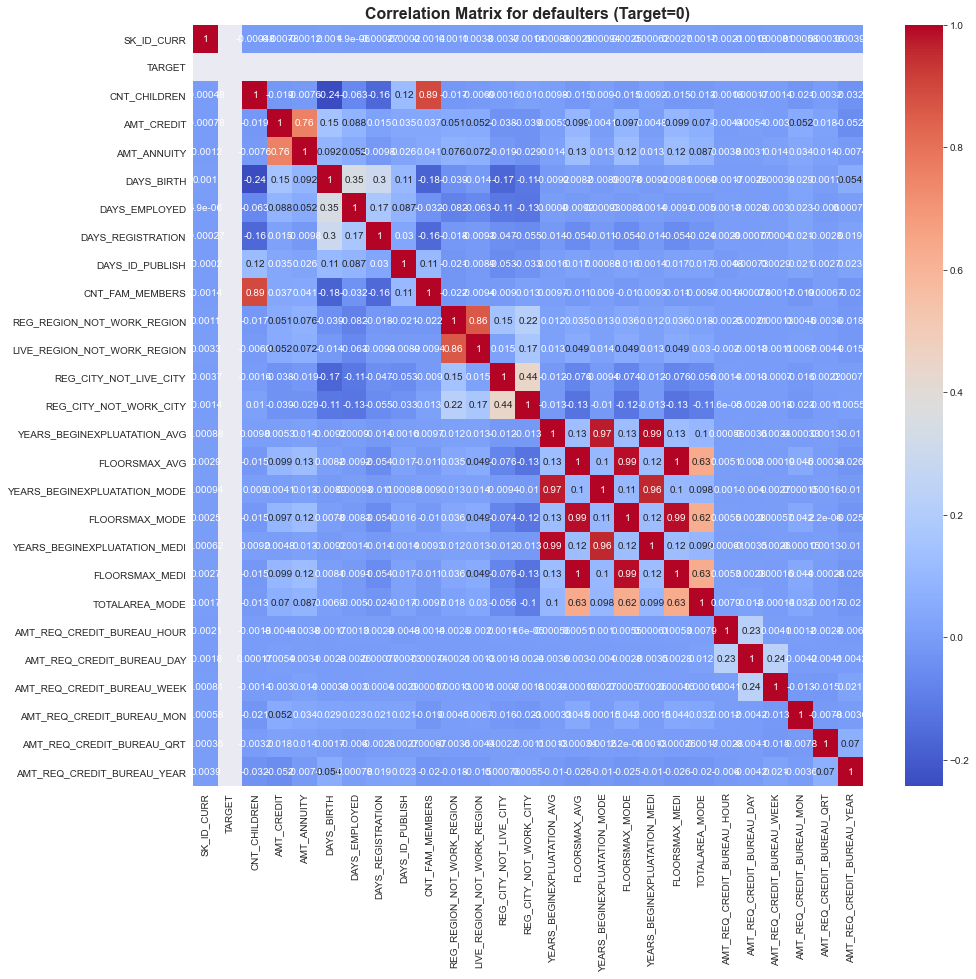

In [106]:
# Plotting the correlation for non-defaulter clients with the help of heat map:
plt.figure(figsize=[15,14])
sns.heatmap(non_defaulter.corr(), annot= True, cmap="coolwarm")
plt.title("Correlation Matrix for defaulters (Target=0)", fontsize=16, fontweight="bold" )
plt.show()

In [107]:
## Since target column has null value so it's showing blank rows and columns

In [108]:
## Since the majority is target 0 than target 1, hence calculating imbalance percentage
round(len(non_defaulter)/len(defaulter),2)

10.55

In [109]:
## The imbalance ratio is 10.55

## 6. Univariate Analysis- 
### (a) Categorical Variable

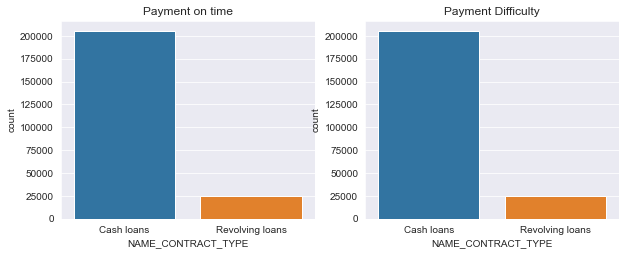

In [110]:
## Selecting the very next column for categorical data analysis after the "Target" column: "NAME_CONTRACT_TYPE"

plt.figure(figsize=(10,8))

# non defaulter subplot
plt.subplot(2,2,1)
pl= sns.countplot(non_defaulter["NAME_CONTRACT_TYPE"])
plt.title("Payment on time")

# defaulter subplot
plt.subplot(2,2,2)
pl= sns.countplot(non_defaulter["NAME_CONTRACT_TYPE"])
plt.title("Payment Difficulty")

plt.show()

In [111]:
## majority of the customer have taken cash loan irrespective of  defaulter or non defaulter

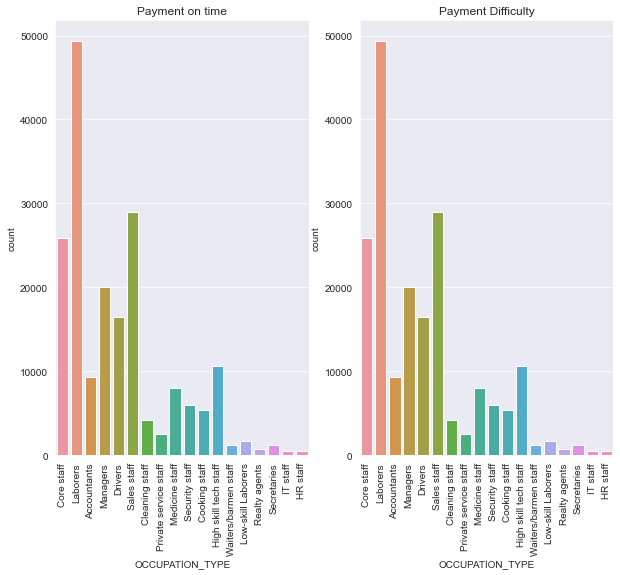

In [112]:
## Plotting next column for categorical data analysis : "OCCUPATION_TYPE"

plt.figure(figsize=(10,8))

# non defaulter subplot
plt.subplot(1,2,1)
pl= sns.countplot(non_defaulter["OCCUPATION_TYPE"])
plt.title("Payment on time")
plt.xticks(rotation=90)

# defaulter subplot
plt.subplot(1,2,2)
pl= sns.countplot(non_defaulter["OCCUPATION_TYPE"])
plt.title("Payment Difficulty")
plt.xticks(rotation=90)

plt.show()

In [113]:
# Majority of customer applied for loans belong to 'laborers' category irrespective of defaulter or non defaulter,
#whereas 'IT Staff' and 'HR Staff' are mostly self sufficient

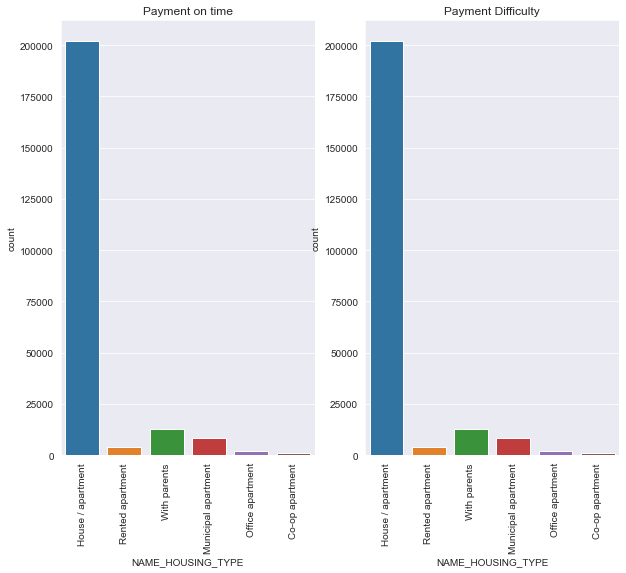

In [114]:
## Plotting next column for categorical data analysis : "NAME_HOUSING_TYPE"

plt.figure(figsize=(10,8))

# non defaulter subplot
plt.subplot(1,2,1)
pl= sns.countplot(non_defaulter["NAME_HOUSING_TYPE"])
plt.title("Payment on time")
plt.xticks(rotation=90)

# defaulter subplot
plt.subplot(1,2,2)
pl= sns.countplot(non_defaulter["NAME_HOUSING_TYPE"])
plt.title("Payment Difficulty")
plt.xticks(rotation=90)

plt.show()

In [115]:
## majority of the customer who have taken loan stays in "House/Apartment" irrespective of  defaulter or non defaulter
# whereas minimum loan applied by people who stays in co-op apartment

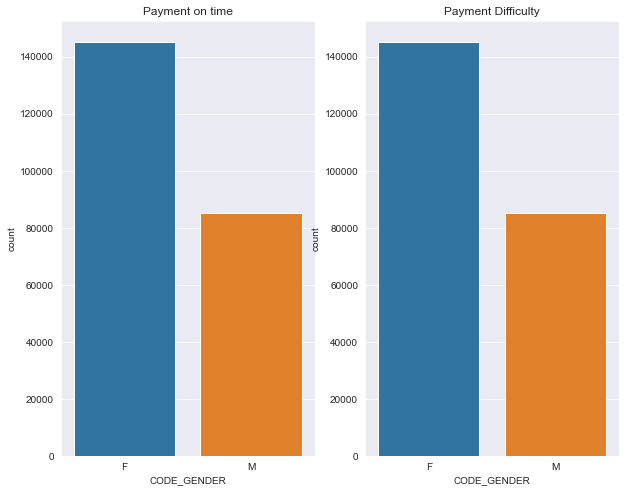

In [116]:
## Plotting next column for categorical data analysis : "CODE_GENDER"

plt.figure(figsize=(10,8))

# non defaulter subplot
plt.subplot(1,2,1)
pl= sns.countplot(non_defaulter["CODE_GENDER"])
plt.title("Payment on time")


# defaulter subplot
plt.subplot(1,2,2)
pl= sns.countplot(non_defaulter["CODE_GENDER"])
plt.title("Payment Difficulty")


plt.show()

In [117]:
## Female have high ratio for both defaulter and non defaulter

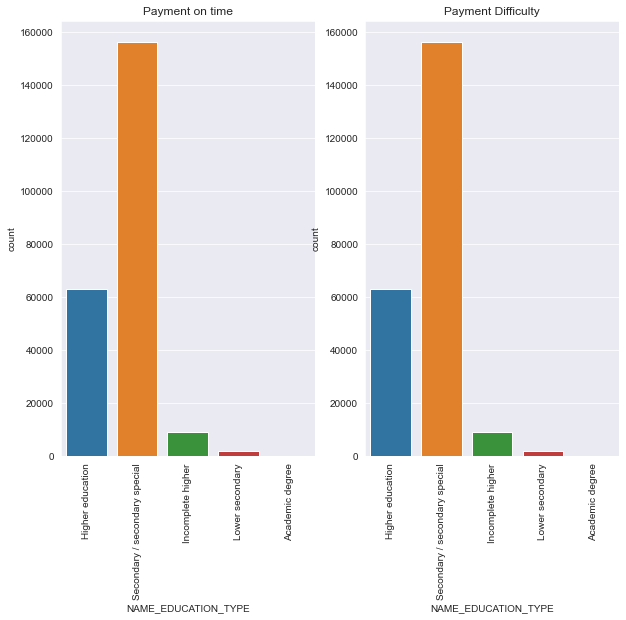

In [118]:
## Plotting next column for categorical data analysis : "NAME_EDUCATION_TYPE"

plt.figure(figsize=(10,8))

# non defaulter subplot
plt.subplot(1,2,1)
pl= sns.countplot(non_defaulter["NAME_EDUCATION_TYPE"])
plt.title("Payment on time")
plt.xticks(rotation=90)


# defaulter subplot
plt.subplot(1,2,2)
pl= sns.countplot(non_defaulter["NAME_EDUCATION_TYPE"])
plt.title("Payment Difficulty")
plt.xticks(rotation=90)


plt.show()

In [119]:
## Highest laon proportion with "Secondary/secondary special" in both the cases.. lower is academic degree

## 7. Univariate Analysis- 
### (b) Numerical Variables

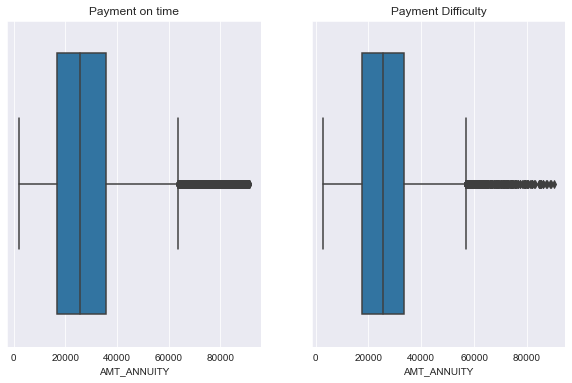

In [120]:
## Plotting next column for Numerical data analysis : "AMT_ANNUITY"


plt.figure(figsize=[10,6])
plt.subplot(1,2,1)

sns.boxplot(non_defaulter[non_defaulter['AMT_ANNUITY'] < 91251]['AMT_ANNUITY'])
plt.title('Payment on time')

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.boxplot(defaulter[defaulter['AMT_ANNUITY'] < 91251]['AMT_ANNUITY'])
plt.title('Payment Difficulty')
plt.show()

In [121]:
# This shows that for non defaulters loan of annuity amount lies between 15000-35000 whereas for defaulters 
#lies in the range of 17000-32000

In [122]:
def unidistplot(var):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,6))
    
    sns.distplot(a=non_defaulter[var],ax=ax1)
    ax1.set_title(f'distribution of {var} for Non_defaulters', fontsize=15)
    
    sns.distplot(a=defaulter[var],ax=ax2)
    ax2.set_title(f'distribution of {var} for defaulters', fontsize=15)
    
    plt.show()

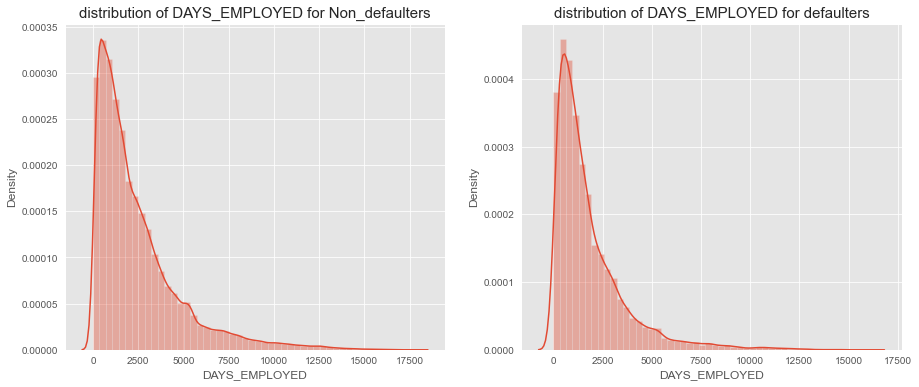

In [123]:
unidistplot("DAYS_EMPLOYED")

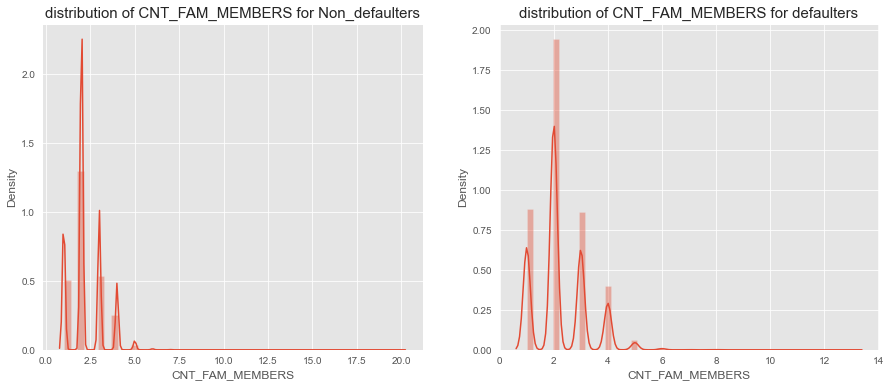

In [124]:
unidistplot("CNT_FAM_MEMBERS")

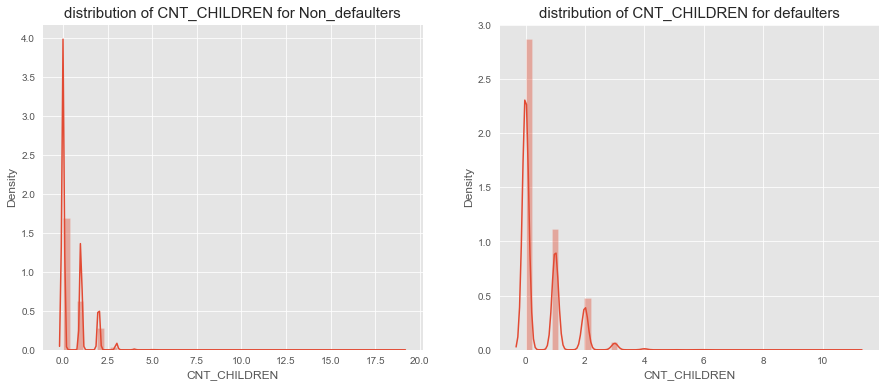

In [125]:
unidistplot("CNT_CHILDREN")

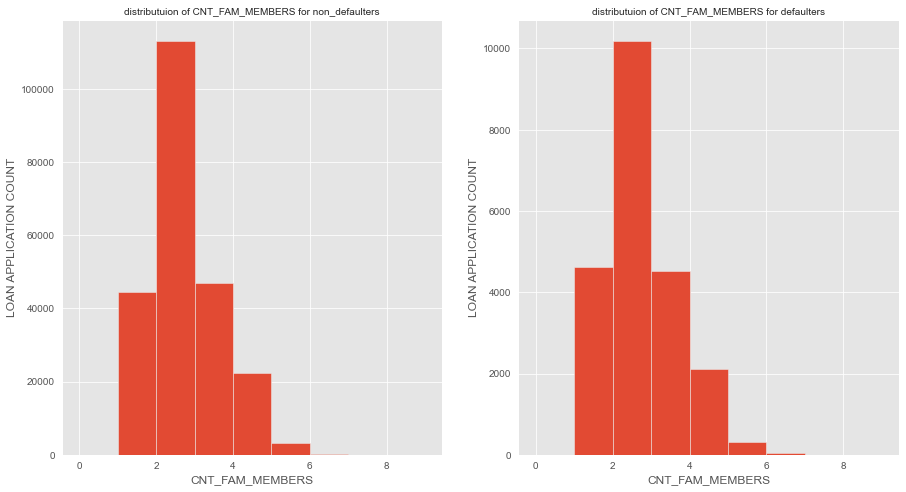

In [126]:
plt.figure(figsize=[15,8])

plt.subplot(1,2,1)
non_defaulter["CNT_FAM_MEMBERS"].plot.hist(bins=range(10))
plt.title("distributuion of CNT_FAM_MEMBERS for non_defaulters", fontsize=10)
plt.xlabel("CNT_FAM_MEMBERS")
plt.ylabel("LOAN APPLICATION COUNT")

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
defaulter["CNT_FAM_MEMBERS"].plot.hist(bins=range(10))
plt.title("distributuion of CNT_FAM_MEMBERS for defaulters", fontsize=10)
plt.xlabel("CNT_FAM_MEMBERS")
plt.ylabel("LOAN APPLICATION COUNT")
plt.show()

## 8. Bivariate Analysis- 
### (a) Numerical Analysis

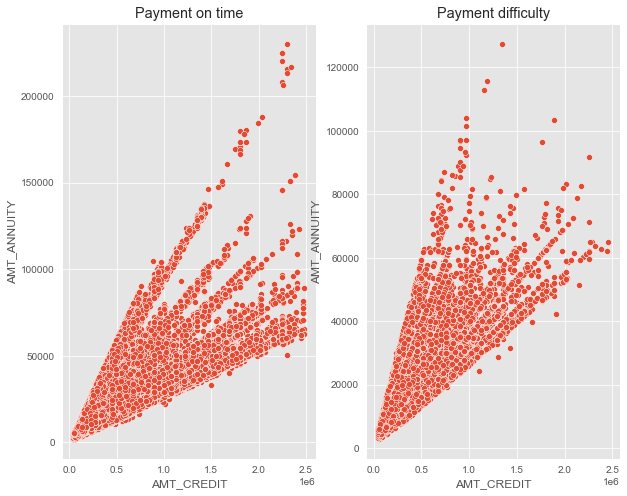

In [127]:
## Plotting "AMT_CREDIT" Vs "AMT_ANNUITY"
plt.figure(figsize=(10,8))

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = non_defaulter[non_defaulter["AMT_CREDIT"] < 2482987], x = "AMT_CREDIT", y = "AMT_ANNUITY")
plt.title("Payment on time")

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = defaulter[defaulter["AMT_CREDIT"] < 2482987], x = "AMT_CREDIT", y = "AMT_ANNUITY")
plt.title("Payment difficulty")

plt.show()

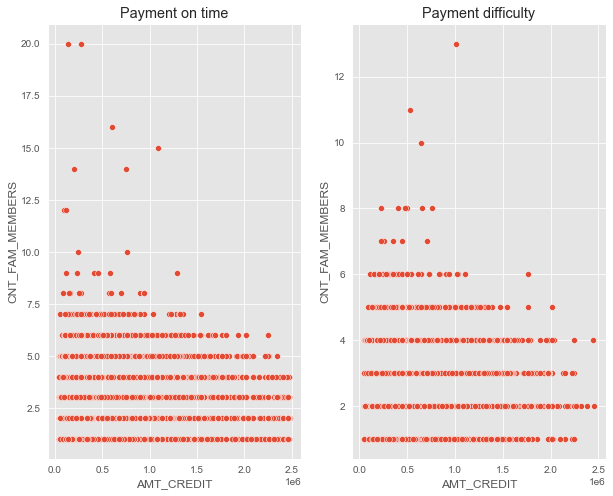

In [128]:
## Plotting "AMT_CREDIT" Vs "AMT_INCOME_TOTAL"
plt.figure(figsize=(10,8))

# Subplot for the non-defaulter clients:
plt.subplot(1,2,1)
sns.scatterplot(data = non_defaulter[non_defaulter["AMT_CREDIT"] < 2482987], x = "AMT_CREDIT", y = "CNT_FAM_MEMBERS")
plt.title("Payment on time")

# Subplot for the defaulter clients:
plt.subplot(1,2,2)
sns.scatterplot(data = defaulter[defaulter["AMT_CREDIT"] < 2482987], x = "AMT_CREDIT", y = "CNT_FAM_MEMBERS")
plt.title("Payment difficulty")

plt.show()

## 9. Bivariate - 
### (b) Numerical-Categorical Analysis

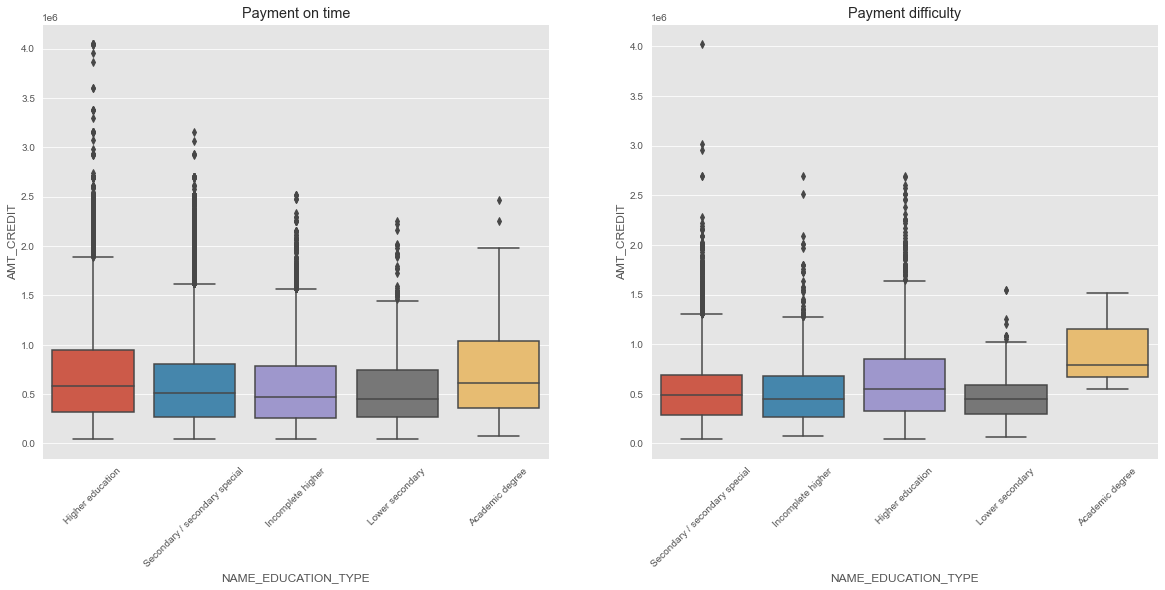

In [129]:
## plotting "NAME_EDUCATION_TYPE" and "AMT_CREDIT"
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

sns.boxplot(data=non_defaulter, y= "AMT_CREDIT", x= "NAME_EDUCATION_TYPE")
plt.title("Payment on time")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=defaulter, y= "AMT_CREDIT", x= "NAME_EDUCATION_TYPE")
plt.title("Payment difficulty")
plt.xticks(rotation=45)

plt.show()

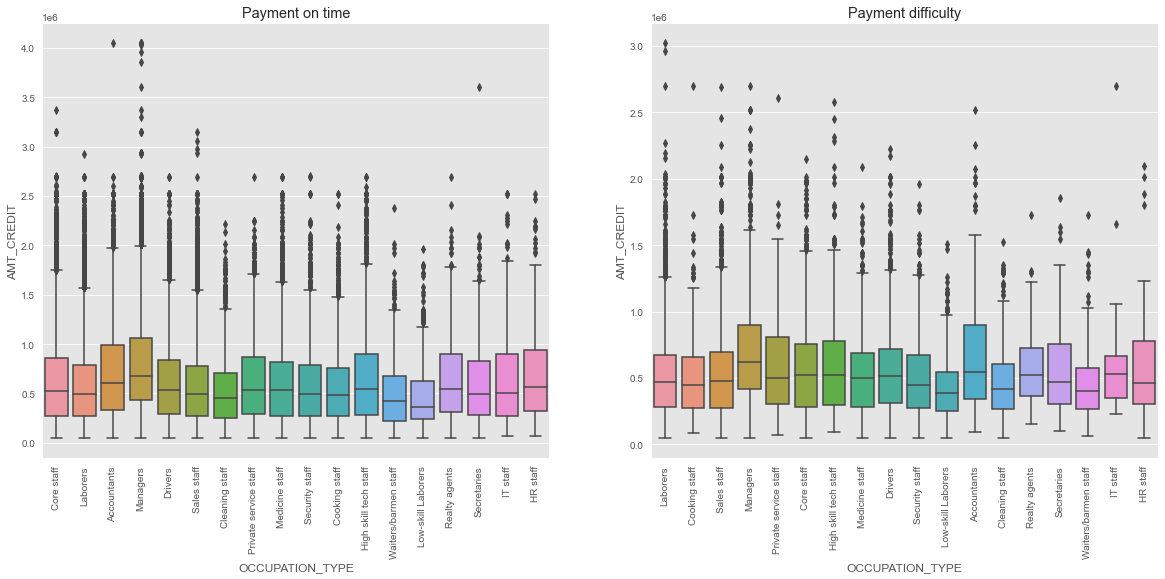

In [130]:
## plotting "OCCUPATION_TYPE" and "AMT_CREDIT"
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)

sns.boxplot(data=non_defaulter, y= "AMT_CREDIT", x= "OCCUPATION_TYPE")
plt.title("Payment on time")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=defaulter, y= "AMT_CREDIT", x= "OCCUPATION_TYPE")
plt.title("Payment difficulty")
plt.xticks(rotation=90)

plt.show()

## 10. Bivariate - 
### (c) Categorical Analysis

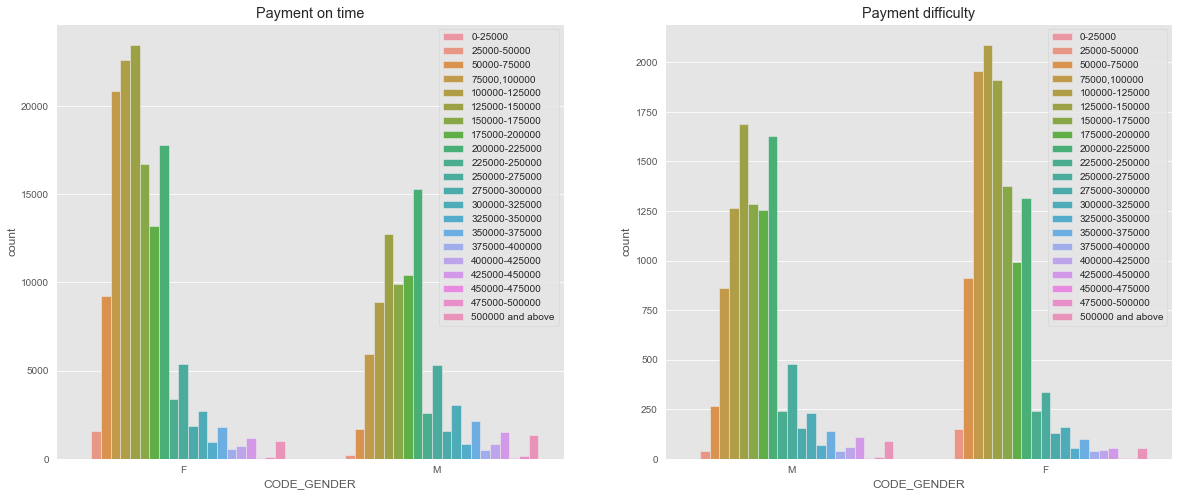

In [131]:
## plotting "CODE_GENDER" and "AMT_INCOME_TOTAL"
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
sns.countplot(data=non_defaulter, x= "CODE_GENDER", hue = "AMT_INCOME_TOTAL")
plt.title("Payment on time")
plt.legend(loc="upper right")

plt.subplot(1,2,2)
sns.countplot(data=defaulter, x= "CODE_GENDER", hue = "AMT_INCOME_TOTAL")
plt.title("Payment difficulty")

plt.legend()
plt.show()

## 11. Load previous application data

In [132]:
## Reading previous application data
prev_app= pd.read_csv(r"/Volumes/Transcend/DS-41 /Credit EDA Excel files/previous_application.csv")
prev_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [133]:
## applying info function
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [134]:
# Checking the shape of data frame "prev_app"
prev_app.shape

(1670214, 37)

In [135]:
# applying describe() on data frame
prev_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [136]:
## Inspecting null values and sorting in descending order:
prev_app.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [137]:
## Applying the nunique() on prev_app to check the unique values in each columns and sorting in ascending order:
prev_app.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

## 12. Finding the missing value and analysing it

In [138]:
len(prev_app)

1670214

In [139]:
## Checking the precentage of null value in columns
missing_value_prev_app=(prev_app.isnull().sum()*100)/len(original_app_data)
# filtering columns with more than 45% missing values:
missing_column_prev_app= missing_value_prev_app[missing_value_prev_app>45]

# sorting the columns according to the precentage
missing_column_prev_app.sort_values(ascending=False)


RATE_INTEREST_PRIMARY        541.204380
RATE_INTEREST_PRIVILEGED     541.204380
AMT_DOWN_PAYMENT             291.320961
RATE_DOWN_PAYMENT            291.320961
NAME_TYPE_SUITE              266.788830
DAYS_FIRST_DRAWING           218.875097
DAYS_FIRST_DUE               218.875097
DAYS_LAST_DUE_1ST_VERSION    218.875097
DAYS_LAST_DUE                218.875097
DAYS_TERMINATION             218.875097
NFLAG_INSURED_ON_APPROVAL    218.875097
AMT_GOODS_PRICE              125.366247
AMT_ANNUITY                  121.047702
CNT_PAYMENT                  121.046076
dtype: float64

In [140]:
# checking the number of rows in the "missing_column_prev_app"
missing_column_prev_app.shape

(14,)

In [141]:
## Dropping the columns with more than 45% of missing values.
## In order to match the original data frames of 'prev_app' with the updated 
#missing values of "prev_app" and assigning into the new variable ""

new_prev_data = prev_app.drop(columns= missing_column_prev_app.index)
new_prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

## 13. Outlier Analysis

In [142]:
# Checking the column "AMT_CREDIT" in the data frame:

new_prev_data["AMT_CREDIT"].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

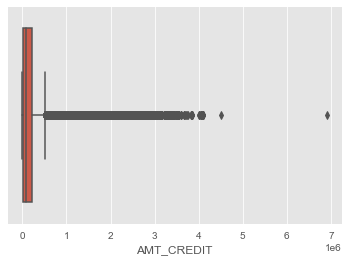

In [143]:
# Plotting  "AMT_CREDIT":

sns.boxplot(new_prev_data["AMT_CREDIT"])
plt.show()

In [144]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_prev_data["AMT_CREDIT"].quantile(0.25)
Q3= new_prev_data["AMT_CREDIT"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

793192.5

In [145]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 793192:
outlier_1 = (new_prev_data["AMT_CREDIT"]<=793192)
#final value of outlier after applying the outlier_1 to "AMT_CREDIT"
final_outlier =new_prev_data["AMT_CREDIT"][outlier_1]
final_outlier.value_counts()

0.000         336768
45000.000      35051
225000.000     21094
450000.000     19954
135000.000     18720
180000.000     17085
90000.000      13781
270000.000      9842
67500.000       7245
95940.000       6449
143910.000      6386
157500.000      6237
112500.000      5938
675000.000      5348
239850.000      5229
254700.000      4863
765000.000      4779
71955.000       4530
47970.000       4508
512370.000      3802
491580.000      3800
360000.000      3781
202500.000      3761
337500.000      3672
46485.000       3577
152820.000      3464
191880.000      3316
533160.000      3313
315000.000      3218
148365.000      3044
119925.000      2816
269550.000      2653
405000.000      2611
247275.000      2597
203760.000      2505
247500.000      2480
767664.000      2445
470790.000      2421
585000.000      2358
744498.000      2277
540000.000      2167
197820.000      2136
92970.000       2116
69727.500       1926
241920.000      1918
139455.000      1776
721332.000      1745
299223.000   

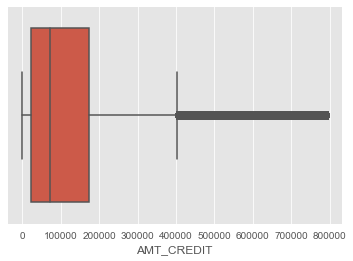

In [146]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [147]:
final_outlier.describe()

count    1.574503e+06
mean     1.328155e+05
std      1.662000e+05
min      0.000000e+00
25%      2.144250e+04
50%      7.140600e+04
75%      1.741185e+05
max      7.928955e+05
Name: AMT_CREDIT, dtype: float64

In [148]:
# Checking the column "AMT_APPLICATION" in the data frame:

new_prev_data["AMT_APPLICATION"].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

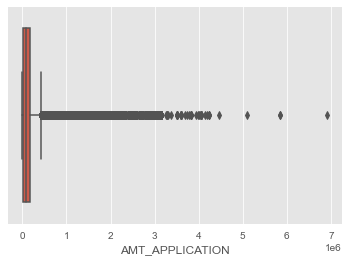

In [149]:
# Plotting  "AMT_APPLICATION":

sns.boxplot(new_prev_data["AMT_APPLICATION"])
plt.show()

In [150]:
# calculating outliers Q1 and Q3 and calculating Inter Quartile Range(IQR)
Q1= new_prev_data["AMT_APPLICATION"].quantile(0.25)
Q3= new_prev_data["AMT_APPLICATION"].quantile(0.75)
IQR= Q3-Q1
outliers_value= Q3+(3*IQR)
outliers_value

665280.0

In [151]:
# Drop the values which lies beyond the outlier values and plot them again:
# creating a var outlier_1 and assign value less than or eqaul to 665280:
outlier_1 = (new_prev_data["AMT_APPLICATION"]<=665280)
#final value of outlier after applying the outlier_1 to "AMT_APPLICATION"
final_outlier =new_prev_data["AMT_APPLICATION"][outlier_1]
final_outlier.value_counts()

0.000         392402
45000.000      47831
225000.000     43543
135000.000     40678
450000.000     38905
90000.000      29367
180000.000     24738
270000.000     20573
67500.000      16861
112500.000     14378
315000.000     11920
229500.000     10756
337500.000     10539
360000.000     10284
157500.000     10222
202500.000      7943
247500.000      7175
454500.000      7039
540000.000      6843
405000.000      5876
585000.000      4763
292500.000      3786
495000.000      3749
630000.000      2868
31455.000       2569
22455.000       2545
382500.000      2486
44955.000       2350
26955.000       2333
472500.000      2301
184500.000      2225
62955.000       2224
35955.000       2219
40455.000       1970
238500.000      1941
54000.000       1880
58455.000       1851
53955.000       1827
103500.000      1715
17955.000       1711
94500.000       1709
67455.000       1675
89955.000       1635
148500.000      1631
49455.000       1628
81000.000       1497
463500.000      1496
427500.000   

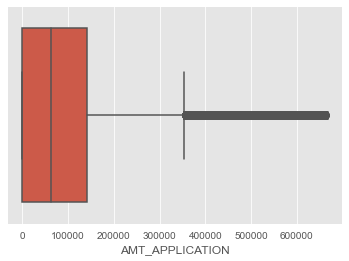

In [152]:
## plot the final_outlier by exculding outlier_values
sns.boxplot(final_outlier)
plt.show()

In [153]:
final_outlier.describe()

count    1.549470e+06
mean     1.074501e+05
std      1.297784e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.286950e+04
75%      1.415241e+05
max      6.652800e+05
Name: AMT_APPLICATION, dtype: float64

## 14. Joining the data frames "prev_app" and "original_app_data"

In [154]:
merged_dataset = pd.merge(left= original_app_data, right= prev_app,how="inner", on="SK_ID_CURR", suffixes="_x")
merged_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100002       1          Cash loans           M            N   
1      100003       0          Cash loans           F            N   
2      100003       0          Cash loans           F            N   
3      100003       0          Cash loans           F            N   
4      100004       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0          202500.0     406597.5       24700.5   
1               N             0          270000.0    1293502.5       35698.5   
2               N             0          270000.0    1293502.5       35698.5   
3               N             0          270000.0    1293502.5       35698.5   
4               Y             0           67500.0     135000.0        6750.0   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE_ NAME_INCOME_TYPE  \
0          351000.0    Unaccompanied          Working   
1         1129500.0           Family    State servant   
2         1129500.0           Family    State servant   
3         1129500.0           Family    State servant   
4          135000.0    Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.003541      -16765          -1188            -1186.0   
3                    0.003541      -16765          -1188            -1186.0   
4                    0.010032      -19046           -225            -4260.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2             -291          NaN           1               1                0   
3             -291          NaN           1               1                0   
4            -2531         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_  HOUR_APPR_PROCESS_START_  \
0                   WEDNESDAY                        10   
1                      MONDAY                        11   
2                      MONDAY                        11   
3                      MONDAY                        11   
4                      MONDAY                         9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0               

In [155]:
# applying the info()
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [156]:
## Since the dataset is very large info() will not display all the column so verbose=True or info(-1) is used 
# to display to all columns
merged_dataset.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 158 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE_           object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT_                   float64
 9    AMT_ANNUITY_                  float64
 10   AMT_GOODS_PRICE_              float64
 11   NAME_TYPE_SUITE_              object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   

In [157]:
merged_dataset.shape

(1413701, 158)

## 15.  Univariate Analysis


In [158]:
merged_dataset["NAME_CONTRACT_STATUS"].value_counts()

Approved        886099
Canceled        259441
Refused         245390
Unused offer     22771
Name: NAME_CONTRACT_STATUS, dtype: int64

In [159]:
merged_dataset["NAME_CONTRACT_STATUS"].value_counts(normalize=True)

Approved        0.626794
Canceled        0.183519
Refused         0.173580
Unused offer    0.016107
Name: NAME_CONTRACT_STATUS, dtype: float64

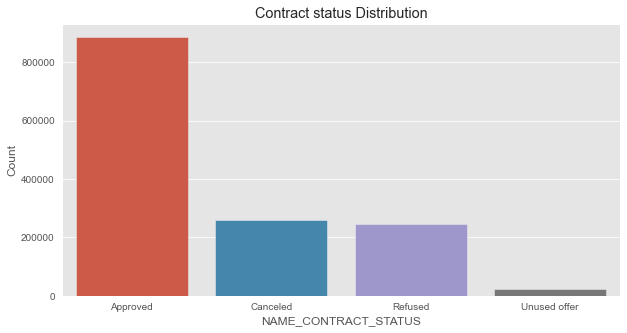

In [160]:
##Plotting te column
plt.figure(figsize=[10,5])

sns.countplot(merged_dataset["NAME_CONTRACT_STATUS"])
plt.xlabel("NAME_CONTRACT_STATUS")
plt.ylabel("Count")

plt.title("Contract status Distribution")
plt.show()

In [161]:
## Inference: Maximum of the application were approved

In [162]:
## Dividing the "NAME_CONTRACT_STATUS" column based on the 4 types of contract status
approved= merged_dataset[merged_dataset["NAME_CONTRACT_STATUS"]=="Approved"]
refused= merged_dataset[merged_dataset["NAME_CONTRACT_STATUS"]=="Refused"]
canceled= merged_dataset[merged_dataset["NAME_CONTRACT_STATUS"]=="Canceled"]
unused= merged_dataset[merged_dataset["NAME_CONTRACT_STATUS"]=="Unused offer"]

In [163]:
# There is a similar column named "NAME_CONTRACT_TYPEx", to check if it has dupilcate values for the column
#"NAME_CONTRACT_STATUS or not:
merged_dataset["NAME_CONTRACT_TYPEx"].value_counts()

Cash loans         626764
Consumer loans     625256
Revolving loans    161368
XNA                   313
Name: NAME_CONTRACT_TYPEx, dtype: int64

In [164]:
# We can see that the column values are different
# we can use the information to obtain bivariate analysis

## 16. Bivariate Analysis

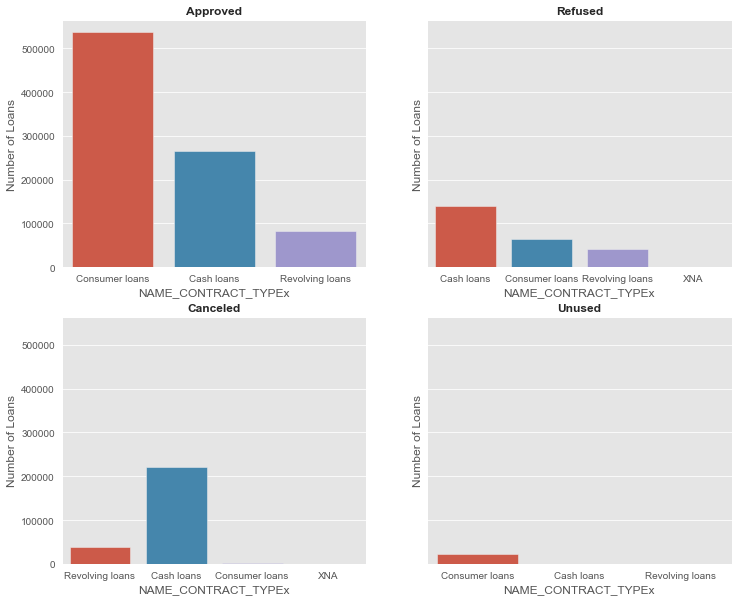

In [165]:
# NAME_CONTRACT_TYPEx
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharey=True)

ax1= sns.countplot(ax=ax1, data = approved, x= "NAME_CONTRACT_TYPEx")
ax1.set_title("Approved", fontsize=12, fontweight= "bold")
ax1.set_xlabel("NAME_CONTRACT_TYPEx")
ax1.set_ylabel("Number of Loans")

ax2= sns.countplot(ax=ax2, data = refused, x= "NAME_CONTRACT_TYPEx")
ax2.set_title("Refused", fontsize=12, fontweight= "bold")
ax2.set_xlabel("NAME_CONTRACT_TYPEx")
ax2.set_ylabel("Number of Loans")

ax3= sns.countplot(ax=ax3, data = canceled, x= "NAME_CONTRACT_TYPEx")
ax3.set_title("Canceled", fontsize=12, fontweight= "bold")
ax3.set_xlabel("NAME_CONTRACT_TYPEx")
ax3.set_ylabel("Number of Loans")

ax4= sns.countplot(ax=ax4, data = unused, x= "NAME_CONTRACT_TYPEx")
ax4.set_title("Unused", fontsize=12, fontweight= "bold")
ax4.set_xlabel("NAME_CONTRACT_TYPEx")
ax4.set_ylabel("Number of Loans")

plt.show()

In [166]:
## Inference: The data shows over all females tend to have higher proportion than males.

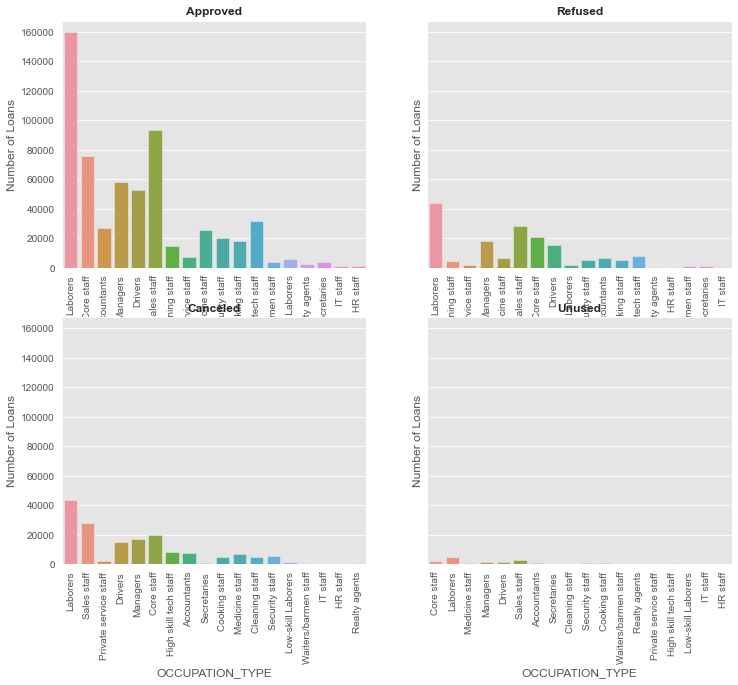

In [167]:
# OCCUPATION_TYPE
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharey=True)

ax1= sns.countplot(ax=ax1, data = approved, x= "OCCUPATION_TYPE")
ax1.set_title("Approved", fontsize=12, fontweight= "bold")
ax1.set_xlabel("OCCUPATION_TYPE")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("Number of Loans")

ax2= sns.countplot(ax=ax2, data = refused, x= "OCCUPATION_TYPE")
ax2.set_title("Refused", fontsize=12, fontweight= "bold")
ax2.set_xlabel("OCCUPATION_TYPE")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_ylabel("Number of Loans")

ax3= sns.countplot(ax=ax3, data = canceled, x= "OCCUPATION_TYPE")
ax3.set_title("Canceled", fontsize=12, fontweight= "bold")
ax3.set_xlabel("OCCUPATION_TYPE")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel("Number of Loans")

ax4= sns.countplot(ax=ax4, data = unused, x= "OCCUPATION_TYPE")
ax4.set_title("Unused", fontsize=12, fontweight= "bold")
ax4.set_xlabel("OCCUPATION_TYPE")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_ylabel("Number of Loans")

plt.show()

In [168]:
# Inference: Laborers have the highest proportion in all types of contract status

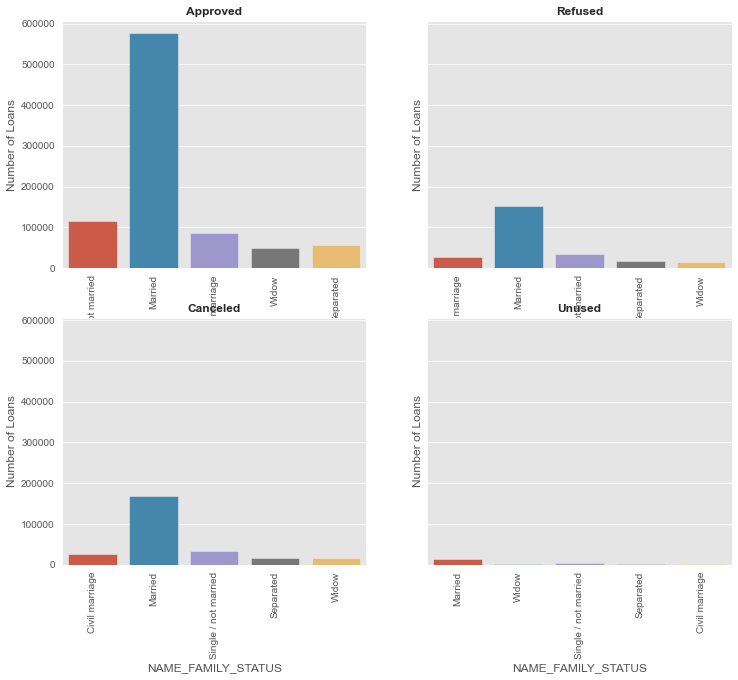

In [169]:
# NAME_FAMILY_STATUS
fig,((ax1,ax2),(ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharey=True)

ax1= sns.countplot(ax=ax1, data = approved, x= "NAME_FAMILY_STATUS")
ax1.set_title("Approved", fontsize=12, fontweight= "bold")
ax1.set_xlabel("NAME_FAMILY_STATUS")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_ylabel("Number of Loans")

ax2= sns.countplot(ax=ax2, data = refused, x= "NAME_FAMILY_STATUS")
ax2.set_title("Refused", fontsize=12, fontweight= "bold")
ax2.set_xlabel("NAME_FAMILY_STATUS")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_ylabel("Number of Loans")

ax3= sns.countplot(ax=ax3, data = canceled, x= "NAME_FAMILY_STATUS")
ax3.set_title("Canceled", fontsize=12, fontweight= "bold")
ax3.set_xlabel("NAME_FAMILY_STATUS")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
ax3.set_ylabel("Number of Loans")

ax4= sns.countplot(ax=ax4, data = unused, x= "NAME_FAMILY_STATUS")
ax4.set_title("Unused", fontsize=12, fontweight= "bold")
ax4.set_xlabel("NAME_FAMILY_STATUS")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)
ax4.set_ylabel("Number of Loans")

plt.show()

In [170]:
## Inference: Married people is high in all contract status

## Conclusion

In [171]:
# As per the given data, the following types of customers are least likely to default amongst others:
# 1. Working professionals
# 2. Married people
# 3. Laborers